<h1> Implementing matrix factorization by using QR decomposition </H1>

In [0]:
# Clone the entire repo.
!git clone -l -s https://github.com/Chinmay-jain767/Recommendation_Engine.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 3), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (23/23), done.
/content/cloned-repo/cloned-repo/cloned-repo
'Implementing MF using SVD AND QR decomposition.ipynb'	 MovieLen1M
 LICENSE						 README.md
 MovieLen100k


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [0]:
new_header = ['MovieID','Title','Genres'] 
new_header2=['UserID','Gender','Age','Occupation','Zip-code']
new_header3=['UserID','MovieID','Rating','Timestamp']


In [0]:
Movies = pd.read_csv("./MovieLen1M/movies.dat", sep='::',header=None,names=new_header)
Ratings = pd.read_csv("./MovieLen1M/ratings.dat", sep='::',header=None,names=new_header3)
Links = pd.read_csv("./MovieLen1M/users.dat", sep='::',header=None,names=new_header2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel 

In [0]:
Movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
Links.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [0]:
Ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<h3> combining movies and ratings data into one dataframe </h3>

In [0]:
df1=pd.merge(Movies, Ratings, on='MovieID', how='inner')

In [0]:
df1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


<h4> removing movieId and timestamp from df1 </h4>

In [0]:
df2=df1.drop(['MovieID','Timestamp'],axis=1)

In [0]:
df2.head()

,Title,Genres,UserID,Rating
0,Toy Story (1995),Animation|Children's|Comedy,1,5
1,Toy Story (1995),Animation|Children's|Comedy,6,4
2,Toy Story (1995),Animation|Children's|Comedy,8,4
3,Toy Story (1995),Animation|Children's|Comedy,9,5
4,Toy Story (1995),Animation|Children's|Comedy,10,5


<h3> dataframe of users giving rating to each movie</h3>

In [0]:
user_rating=df2.pivot(index='UserID',columns='Title',values='Rating').fillna(0)

In [0]:
user_rating

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [0]:
df3 = user_rating.as_matrix()
user_ratings_mean = np.mean(df3, axis = 1)
R_demeaned =  user_ratings_mean.reshape(-1, 1)-df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
df3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
R_demeaned

array([[0.05990286, 0.05990286, 0.05990286, ..., 0.05990286, 0.05990286,
        0.05990286],
       [0.12924987, 0.12924987, 0.12924987, ..., 0.12924987, 0.12924987,
        0.12924987],
       [0.05369671, 0.05369671, 0.05369671, ..., 0.05369671, 0.05369671,
        0.05369671],
       ...,
       [0.02050729, 0.02050729, 0.02050729, ..., 0.02050729, 0.02050729,
        0.02050729],
       [0.1287102 , 0.1287102 , 0.1287102 , ..., 0.1287102 , 0.1287102 ,
        0.1287102 ],
       [0.3291959 , 0.3291959 , 0.3291959 , ..., 0.3291959 , 0.3291959 ,
        0.3291959 ]])

<h2>Singular Value Decomposition</h2>

In [0]:
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
rmse=[]
x=np.arange(20 ,600,1).tolist()

In [0]:
for i in range(20,600):
    U, sigma, Vt = svds(R_demeaned, k = i)
    sigma = np.diag(sigma)
    all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    rmse.extend([mean_squared_error(R_demeaned,all_user_predicted_ratings)])

Text(0, 0.5, 'mean_squared_error')

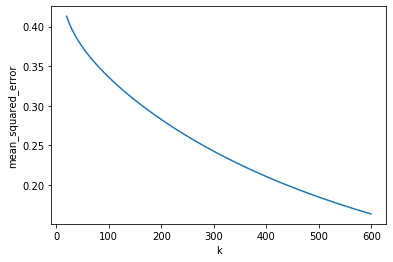

In [0]:
import matplotlib.pyplot as plt 
plt.plot(x, rmse)
plt.xlabel('k')
plt.ylabel('mean_squared_error')

In [0]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 300)

In [0]:
sigma = np.diag(sigma)


In [0]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = user_rating.columns)

In [0]:
preds_df

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
0,0.197620,0.027661,-0.004672,0.128201,0.098827,0.121562,0.179982,-1.177458,-0.261572,0.155295,0.371181,0.098363,-0.024917,0.178980,-0.181668,-0.053336,0.362233,0.258036,0.149150,0.125108,0.259624,0.097246,0.116493,0.108788,0.087708,0.086803,0.196110,0.314538,0.223291,0.218835,0.128408,0.117915,0.098943,0.098921,0.014031,0.149498,-0.007842,0.118177,0.100180,-0.056356,...,0.060690,-0.023052,0.119005,0.291929,0.125370,-0.106873,-0.516393,0.103689,0.302738,-1.558380,-0.110780,0.108442,-0.487314,0.082758,0.135064,0.282721,0.124460,0.156960,0.064683,0.452421,0.128464,-0.213966,0.114042,0.145403,0.074844,-0.097553,0.212588,0.044885,0.524207,0.309072,0.119328,0.376689,0.058792,0.342881,0.123955,0.181786,-0.267545,0.140517,0.138475,-0.270178
1,0.208811,0.398435,0.302571,0.328780,0.293174,0.250820,-0.240977,0.587174,0.308222,-0.001030,-0.918538,0.187707,0.314337,0.308522,-0.227061,0.398071,-0.435400,0.428096,0.260815,0.268342,0.383181,0.293842,0.232721,0.286326,0.067332,0.335405,0.053856,0.355944,0.285318,0.154509,0.411024,0.084525,0.417628,0.241881,0.733230,0.269095,0.309145,0.258356,0.279722,0.532150,...,0.232216,0.254034,0.237625,0.171451,0.215948,0.338567,-0.551651,0.297363,0.208975,0.161756,0.392293,-0.029234,0.663063,-0.351629,0.289573,0.148429,0.245613,0.230399,0.288191,-0.106444,0.188770,0.318387,-0.299619,0.151732,0.256746,-0.077199,0.444831,0.809966,0.159538,0.001055,0.361240,0.458987,0.233062,0.097926,0.233885,0.275768,-0.272095,0.267127,0.238855,0.544393
2,-0.003354,0.214936,0.140858,0.032952,0.348140,0.123201,0.065468,-0.074588,-0.000934,-0.061847,-0.405399,0.132779,0.173897,0.125004,-0.018760,0.251741,0.318516,0.734248,0.112082,0.113261,-0.595539,0.092978,0.105631,0.107372,0.137627,-0.232102,0.149831,-0.001008,0.365302,0.090777,-0.039657,0.090315,0.131283,0.107292,0.133485,0.058612,0.172320,0.131236,0.164658,0.061111,...,0.108329,0.158967,0.098911,0.238755,0.116467,0.231290,-0.137731,0.033135,-0.039127,-0.330038,0.012978,-0.411445,0.715397,0.068734,0.131385,-0.063

<h1> QR decomposition </h1>

In [0]:
q,r=np.linalg.qr(R_demeaned)

In [0]:
r

array([[-2.47826014e+01, -8.11930654e+00, -9.63849683e+00, ...,
        -1.13526910e+01, -1.16996477e+01,  6.07688967e+00],
       [ 0.00000000e+00, -3.00388849e+01, -4.78211227e+00, ...,
        -3.86876688e+00, -3.02923643e+00,  1.63856946e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.30171132e+01, ...,
        -6.30466356e+00, -5.92534045e+00,  1.62937624e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.53856664e-01,  1.30739877e-01,  1.23116788e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  3.98453999e+00, -3.98453999e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.44342862e-12]])

In [0]:
q

array([[-0.00241713, -0.00134084, -0.00131177, ...,  0.00662544,
        -0.0074186 , -0.19039958],
       [-0.00521535, -0.00289308, -0.00283036, ..., -0.0117088 ,
         0.01225823,  0.09843141],
       [-0.00216671, -0.00120193, -0.00117587, ..., -0.00841287,
        -0.00524302,  0.17057017],
       ...,
       [-0.00082749, -0.00045903, -0.00044908, ...,  0.0030453 ,
        -0.00627349, -0.00844849],
       [-0.00519357, -0.002881  , -0.00281854, ..., -0.01787816,
         0.00976914, -0.01256682],
       [-0.01328335, -0.00736859, -0.00720885, ...,  0.01328978,
        -0.00644636, -0.000584  ]])

In [0]:
prediction=np.dot(q,r)

In [0]:
prediction

array([[0.05990286, 0.05990286, 0.05990286, ..., 0.05990286, 0.05990286,
        0.05990286],
       [0.12924987, 0.12924987, 0.12924987, ..., 0.12924987, 0.12924987,
        0.12924987],
       [0.05369671, 0.05369671, 0.05369671, ..., 0.05369671, 0.05369671,
        0.05369671],
       ...,
       [0.02050729, 0.02050729, 0.02050729, ..., 0.02050729, 0.02050729,
        0.02050729],
       [0.1287102 , 0.1287102 , 0.1287102 , ..., 0.1287102 , 0.1287102 ,
        0.1287102 ],
       [0.3291959 , 0.3291959 , 0.3291959 , ..., 0.3291959 , 0.3291959 ,
        0.3291959 ]])

In [0]:
prediction_df=pd.DataFrame(prediction, columns = user_rating.columns)

In [0]:
prediction_df

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
0,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,...,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903,0.059903
1,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,...,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,-3.870750,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250,0.129250
2,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,-2.946303,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,...,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.053697,0.0

In [0]:
import scipy.io
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
from numpy import random
import pickle
import timeit
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(user_rating,test_size=0.25)

train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [0]:
train_data

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
test_data

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",187 (1997),2 Days in the Valley (1996),20 Dates (1998),"20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),2001: A Space Odyssey (1968),2010 (1984),24 7: Twenty Four Seven (1997),24-hour Woman (1998),28 Days (2000),3 Ninjas: High Noon On Mega Mountain (1998),3 Strikes (2000),"301, 302 (1995)","39 Steps, The (1935)","400 Blows, The (Les Quatre cents coups) (1959)",42 Up (1998),52 Pick-Up (1986),54 (1998),"7th Voyage of Sinbad, The (1958)",8 1/2 (1963),8 1/2 Women (1999),8 Heads in a Duffel Bag (1997),8 Seconds (1994),8MM (1999),A Chef in Love (1996),Abbott and Costello Meet Frankenstein (1948),"Abominable Snowman, The (1957)",About Adam (2000),About Last Night... (1986),...,Wonderland (1997),Wonderland (1999),Woo (1998),"Wood, The (1999)","Wooden Man's Bride, The (Wu Kui) (1994)",Working Girl (1988),"World Is Not Enough, The (1999)","World of Apu, The (Apur Sansar) (1959)","Wrong Man, The (1956)","Wrong Trousers, The (1993)",Wrongfully Accused (1998),Wyatt Earp (1994),"X-Files: Fight the Future, The (1998)",X-Men (2000),X: The Unknown (1956),Xiu Xiu: The Sent-Down Girl (Tian yu) (1998),Yankee Zulu (1994),"Yards, The (1999)","Year My Voice Broke, The (1987)",Year of Living Dangerously (1982),Year of the Horse (1997),Yellow Submarine (1968),Yojimbo (1961),You Can't Take It With You (1938),You So Crazy (1994),You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

<h1>Optimizing p and q</h1>

In [0]:
P=q
Q=r
users,items = df3.nonzero()

In [0]:

for u, i in zip(users,items):
        e=df3[u,i]-np.dot(P[u, i],Q[i, i].T) #calculate error for gradient
        p_temp = 0.01 * ( e *Q[i,:] -  0.5*P[u,:])
        p_temp[np.isnan(p_temp)] = 0
        Q_TEMP= 0.01 * ( e* P[u,:] - 0.5 *Q[i,:])
        Q_TEMP[np.isnan(Q_TEMP)] = 0
        P[u, :] += p_temp
        Q[i,:]+=Q_TEMP
        
       
Q

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in multiply
  after removing the cwd from sys.path.


array([[-20.37376304,  -6.81209414,  -8.11153096, ...,  -9.43069545,
         -9.71896449,   5.04819794],
       [  0.02865254, -20.75155335,  -3.4133606 , ...,  -2.67729352,
         -2.0852605 ,   1.12822939],
       [  0.02996262,   0.08973134, -17.44726669, ...,  -4.81702958,
         -4.52690892,   1.2354965 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  -0.25385666,
          0.13073988,   0.12311679],
       [        -inf,         -inf,         -inf, ...,          nan,
                 nan,          nan],
       [         inf,          inf,          inf, ...,          inf,
                -inf,          nan]])

In [0]:
Q

array([[-20.37376304,  -6.81209414,  -8.11153096, ...,  -9.43069545,
         -9.71896449,   5.04819794],
       [  0.02865254, -20.75155335,  -3.4133606 , ...,  -2.67729352,
         -2.0852605 ,   1.12822939],
       [  0.02996262,   0.08973134, -17.44726669, ...,  -4.81702958,
         -4.52690892,   1.2354965 ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  -0.25385666,
          0.13073988,   0.12311679],
       [        -inf,         -inf,         -inf, ...,          nan,
                 nan,          nan],
       [         inf,          inf,          inf, ...,          inf,
                -inf,          nan]])

In [0]:
P

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-8.27487201e-04, -4.59027134e-04, -4.49076014e-04, ...,
         3.04529990e-03, -6.27349203e-03, -8.44848722e-03],
       [-8.62232451e+75, -1.03557304e+76, -5.36675234e+76, ...,
        -1.11014079e+76,  1.36395028e+75, -1.61246455e+75],
       [-8.15464152e+76, -9.79402583e+76, -5.07565464e+77, ...,
        -1.04992571e+77,  1.28996834e+76, -1.52500296e+76]])

In [0]:
x=np.dot(P,Q.T)

<h1>Making Movie Recommendations</h1>

In [0]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Title',right_on = 'Title' ).
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False). iloc[:num_recommendations, :-1])
                      
                     



    return user_full,recommendations

<h1>QR decomposition</h1>

In [0]:
already_rated_QR, predictions_QR = recommend_movies(prediction_f, 310, Movies, Ratings, 5)

User 310 has already rated 223 movies.
Recommending the highest 5 predicted ratings movies not already rated.


In [0]:
predictions_QR

,MovieID,Title,Genres
0,4,Waiting to Exhale (1995),Comedy|Drama
1,5,Father of the Bride Part II (1995),Comedy
2,6,Heat (1995),Action|Crime|Thriller
3,8,Tom and Huck (1995),Adventure|Children's
4,9,Sudden Death (1995),Action


In [0]:
already_rated_QR.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,310,719,5,976478304,Multiplicity (1996),Comedy
43,310,2236,5,976477531,Simon Birch (1998),Drama
133,310,3461,5,976481230,Lord of the Flies (1963),Adventure|Drama|Thriller
124,310,1777,5,976477459,"Wedding Singer, The (1998)",Comedy|Romance
122,310,2572,5,976477596,10 Things I Hate About You (1999),Comedy|Romance


In [0]:
prediction_f=pd.DataFrame(x, columns = user_rating.columns)

<h1> SVD decomposition </h1>

In [0]:
already_rated_SVD, predictions_SVD = recommend_movies(preds_df, 310, Movies, Ratings, 5)

User 310 has already rated 223 movies.
Recommending the highest 5 predicted ratings movies not already rated.


In [0]:
already_rated_SVD.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,310,719,5,976478304,Multiplicity (1996),Comedy
43,310,2236,5,976477531,Simon Birch (1998),Drama
133,310,3461,5,976481230,Lord of the Flies (1963),Adventure|Drama|Thriller
124,310,1777,5,976477459,"Wedding Singer, The (1998)",Comedy|Romance
122,310,2572,5,976477596,10 Things I Hate About You (1999),Comedy|Romance


In [0]:
predictions_SVD

,MovieID,Title,Genres
1103,1199,Brazil (1985),Sci-Fi
321,348,Bullets Over Broadway (1994),Comedy
3113,3386,JFK (1991),Drama|Mystery
3026,3298,Boiler Room (2000),Drama
2690,2949,Dr. No (1962),Action


<h1>References:</h1>

https://codeburst.io/explaination-of-recommender-systems-in-information-retrieval-13077e1d916c

https://www.youtube.com/watch?v=ZspR5PZemcs&t=1330s